<a href="https://colab.research.google.com/github/nic-12345/test/blob/main/Gradient_ascent_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

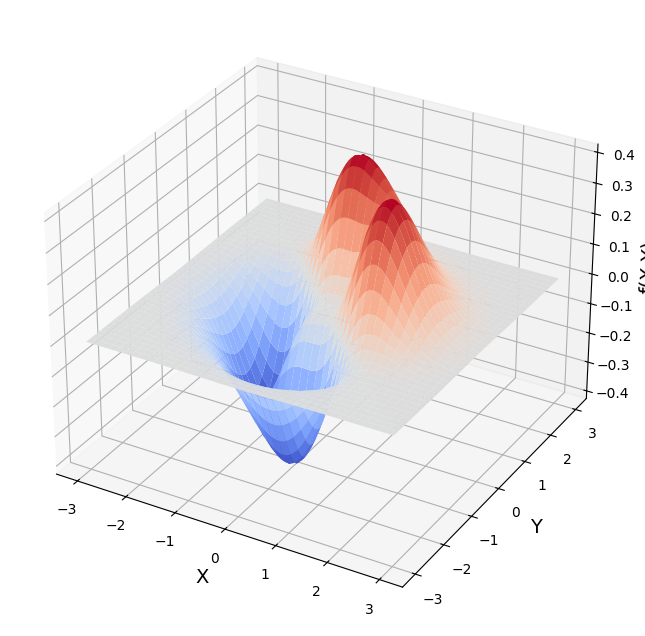

In [3]:
###create surface plot and contour graph of chosen function, to get a better understanding
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
%matplotlib inline
##Surface plot
#creating graph with suibitable range
xp = np.arange(-3.0,3.05,0.05)
yp = np.arange(-3.0,3.05,0.05)
X,Y = np.meshgrid(xp,yp)

#function, Z, that I will work with for now
Z = ((X**3)+(Y**3))*np.exp(-(X**2)-(Y**2))

#adding all useful elements to graph
fig = plt.figure(1,figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X,Y,Z,cmap='coolwarm')

ax.set_xlabel('X',fontsize=14)
ax.set_ylabel('Y',fontsize=14)
ax.set_zlabel('f(X,Y)',fontsize=14);



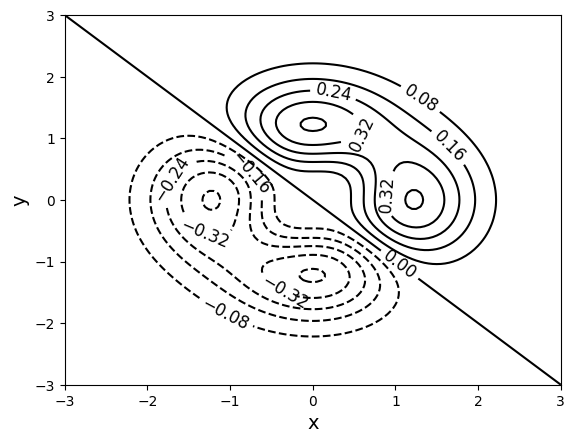

In [4]:
##Contour plot
xp = np.arange(-3.0,3.05,0.05)
yp = np.arange(-3.0,3.05,0.05)
X,Y = np.meshgrid(xp,yp)

Z = ((X**3)+(Y**3))*np.exp(-(X**2)-(Y**2))

fig = plt.figure(1)
ax = fig.add_subplot(111)

B = ax.contour(X,Y,Z,levels=10,colors='k')
ax.clabel(B,fontsize=12)

ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14);


In [5]:
#find the two first partial derivatives of f (NOTE: Changed from numpy to sympy)
import sympy as sym
sym.init_printing()
x, y = sym.symbols(('x y'))
f = ((x**3)+(y**3))*sym.exp(-(x**2)-(y**2))
fx = sym.diff(f,x)
fy = sym.diff(f,y)
eqs = [fx, fy]

#used nonlinsolve comand to find critical points of f, and store in list
SOLS1 = sym.nonlinsolve(eqs, [x,y])
SOLS1 = list(SOLS1)
SOLS1

⎡        ⎛   -√6 ⎞  ⎛   √6⎞  ⎛-√6    ⎞  ⎛√6   ⎞  ⎛-√3   -√3 ⎞  ⎛√3  √3⎞⎤
⎢(0, 0), ⎜0, ────⎟, ⎜0, ──⎟, ⎜────, 0⎟, ⎜──, 0⎟, ⎜────, ────⎟, ⎜──, ──⎟⎥
⎣        ⎝    2  ⎠  ⎝   2 ⎠  ⎝ 2     ⎠  ⎝2    ⎠  ⎝ 2     2  ⎠  ⎝2   2 ⎠⎦

In [6]:
import numpy as np
#define gradient of f
gradf = [fx, fy]

#find directional derivative at a random point, (0,2), in the direction of 7i + 6j
gradfx = fx.subs({x:0, y:2})
gradfy = fy.subs({x:0, y:2})
gradfsub = [gradfx, gradfy]
gradfsub


a = [7, 6]
recip = 1/sym.sqrt(7**2+6**2)
derdiv1 = np.dot(gradfsub,a)*recip
derdiv1


         -4 
-24⋅√85⋅ℯ   
────────────
     17     

In [7]:
#find gradient at (0.6, 0.5)
gradfx1 = fx.subs({x:0.6, y:0.5})
gradfy1 = fy.subs({x:0.6, y:0.5})
gradf65 = [gradfx1, gradfy1]
gradf65

[0.364479762975174, 0.22223050545147]

[(0.6, 0.5), (0.964479762975174, 0.72223050545147), (1.04252976338868, 0.65778 ↪

↪ 1604783486), (1.10918355656617, 0.533706087166198), (1.18092090146634, 0.365 ↪

↪ 71745213982), (1.21964173491963, 0.183713852388895), (1.2244442361151, 0.059 ↪

↪ 7245771730962)]

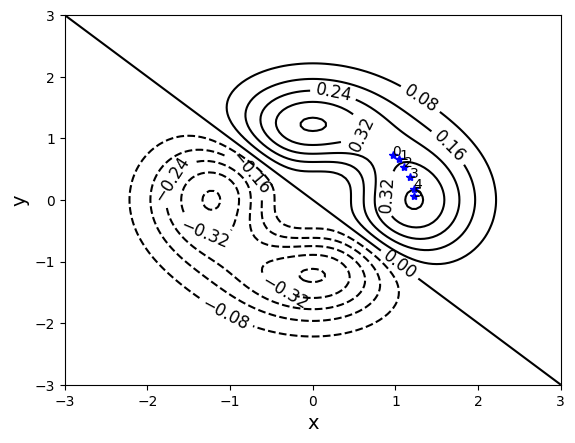

In [8]:
###general iterative update function, ran 6 times

xp = np.arange(-3.0,3.05,0.05)
yp = np.arange(-3.0,3.05,0.05)
X,Y = np.meshgrid(xp,yp)

Z = ((X**3)+(Y**3))*np.exp(-(X**2)-(Y**2))

fig = plt.figure(1)
ax = fig.add_subplot(111)

B = ax.contour(X,Y,Z,levels=10,colors='k')
ax.clabel(B,fontsize=12)

startp = (0.6,0.5)
step5 = [startp]

ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14)
for i in range(6):
    gradfx2 = fx.subs({x:startp[0], y:startp[1]})
    gradfy2 = fy.subs({x:startp[0], y:startp[1]})
    gradfsubbed = [gradfx2, gradfy2]
    startp = tuple(map(sum, zip(startp, gradfsubbed)))
    step5.append(startp)
    ax.plot(startp[0], startp[1], 'b*')
    ax.text(startp[0], startp[1], str(i))
step5

In [9]:
###improved version of gradient ascent, adding a coefficent term to the gradeint of f at an xn.
t = sym.symbols('t')
startP = (0.6,0.5)
gradFx2 = fx.subs({x:startP[0], y:startP[1]})
gradFy2 = fy.subs({x:startP[0], y:startP[1]})
F = f.subs({x: startP[0]+t*gradFx2}).subs({y:startP[1]+t*gradFy2})
Fder = sym.diff(F,t)
T = sym.solveset(Fder, t)
filt_T = [s for s in T if sym.im(s) == 0]
t_0 = max(filt_T, key=lambda s: F.subs(t, s))
print("minimiser (optimal) t_0:", t_0)

minimiser (optimal) t_0: 1.06462972513674


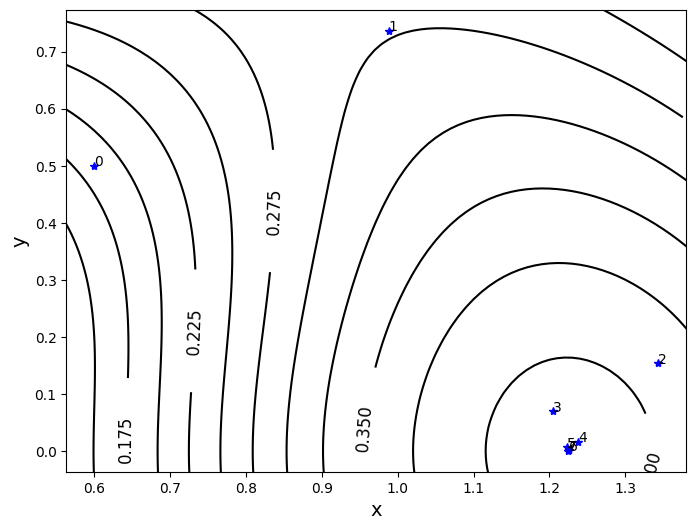

Step 0: (0.6, 0.5)
Step 1: (0.9880359898741636, 0.7365932019357975)
Step 2: (1.3433300899356548, 0.15387613024570357)
Step 3: (1.2048756273590273, 0.0694577116502346)
Step 4: (1.2375975622980484, 0.01579053816100391)
Step 5: (1.2227109467984216, 0.006713874864421649)
Step 6: (1.2259258461088796, 0.001441125579689925)
Step 7: (1.2245595937873945, 0.000608094572702204)


In [26]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

#redefining function and gradient
x, y, t = sym.symbols('x y t')
f = (x**3 + y**3) * sym.exp(-(x**2 + y**2))
fx = sym.diff(f, x)
fy = sym.diff(f, y)

#gradient Ascent
startP = (0.6, 0.5)   #start point, can be changed
smallx = 1e-3
smally = 1e-3
x_iter = [startP]
P = startP

while True:
    gradFx2 = float(fx.subs({x: P[0], y: P[1]}))  # convert SymPy Float to Python float
    gradFy2 = float(fy.subs({x: P[0], y: P[1]}))
    if abs(gradFx2) < smallx and abs(gradFy2) < smally:
        break
    F = f.subs({x: P[0] + t*gradFx2, y: P[1] + t*gradFy2})
    Fder = sym.diff(F, t)
    T = sym.solveset(Fder, t)
    filt_T = [s for s in T if sym.im(s) == 0]
    if not filt_T:
        break
    t_n = max(filt_T, key=lambda s: F.subs(t, s))
    P = (P[0] + float(t_n)*gradFx2, P[1] + float(t_n)*gradFy2)  # ensure floats
    x_iter.append(P)

#plotting points
x_vals = [p[0] for p in x_iter]
y_vals = [p[1] for p in x_iter]

margin = 0.5
x_min, x_max = min(x_vals) - margin, max(x_vals) + margin
y_min, y_max = min(y_vals) - margin, max(y_vals) + margin

xp = np.arange(x_min, x_max, 0.01)
yp = np.arange(y_min, y_max, 0.01)
X, Y = np.meshgrid(xp, yp)

#converting SymPy function to NumPy-compatible function
f_np = sym.lambdify((x, y), f, modules='numpy')
Z = f_np(X, Y)

#plot contour
fig, ax = plt.subplots(figsize=(8,6))
B = ax.contour(X, Y, Z, levels=20, colors='k')
ax.clabel(B, fontsize=12)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)

for i, point in enumerate(x_iter):
    ax.plot(point[0], point[1], 'b*')
    ax.text(point[0], point[1], str(i))

ax.relim()
ax.autoscale_view()
plt.show()
#print points
for i, point in enumerate(x_iter):
    print(f"Step {i}: {point}")
